# Importing dependencies and datasets

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


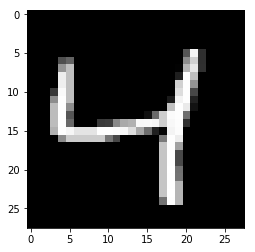

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data' , validation_size = 0)

img = mnist.train.images[2]
plt.imshow(img.reshape((28 , 28)) , cmap = 'Greys_r')

# Network Architecture

In [9]:
inputs_ = tf.placeholder(tf.float32 , (None , 28 , 28 , 1) , name = 'inputs')
targets_ = tf.placeholder(tf.float32 , (None , 28 , 28 , 1) , name = 'targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_ , 16 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)
maxpool1 = tf.layers.max_pooling2d(conv1 , (2 , 2) , (2 , 2) , padding = 'same')
conv2 = tf.layers.conv2d(maxpool1 , 8 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)
maxpool2 = tf.layers.max_pooling2d(conv2 , (2 , 2) , (2 , 2) , padding = 'same')
conv3 = tf.layers.conv2d(maxpool2 , 8 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)
encoded = tf.layers.max_pooling2d(conv3 , (2 , 2) , (2 , 2) , padding = 'same')

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded , (7 , 7))
conv4 = tf.layers.conv2d(upsample1 , 8 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)
upsample2 = tf.image.resize_nearest_neighbor(conv4 , (14 , 14))
conv5 = tf.layers.conv2d(upsample2 , 8 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)
upsample3 = tf.image.resize_nearest_neighbor(conv5 , (28 , 28))
conv6 = tf.layers.conv2d(upsample3 , 16 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)

logits = tf.layers.conv2d(conv6 , 1 , (3 , 3) , padding = 'same' , activation = None)

decoded = tf.nn.sigmoid(logits , name = 'decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_ , logits = logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

# Training

In [10]:
sess = tf.Session()

epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1 , 28 , 28 , 1))
        batch_cost,_ = sess.run([cost , opt] , feed_dict = {inputs_:imgs , targets_:imgs})
        
        print("Epoch: {}/{}...".format(e+1, epochs) , "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6939
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6869
Epoch: 1/20... Training loss: 0.6835
Epoch: 1/20... Training loss: 0.6799
Epoch: 1/20... Training loss: 0.6753
Epoch: 1/20... Training loss: 0.6702
Epoch: 1/20... Training loss: 0.6644
Epoch: 1/20... Training loss: 0.6572
Epoch: 1/20... Training loss: 0.6484
Epoch: 1/20... Training loss: 0.6384
Epoch: 1/20... Training loss: 0.6250
Epoch: 1/20... Training loss: 0.6117
Epoch: 1/20... Training loss: 0.5968
Epoch: 1/20... Training loss: 0.5813
Epoch: 1/20... Training loss: 0.5616
Epoch: 1/20... Training loss: 0.5536
Epoch: 1/20... Training loss: 0.5381
Epoch: 1/20... Training loss: 0.5413
Epoch: 1/20... Training loss: 0.5504
Epoch: 1/20... Training loss: 0.5388
Epoch: 1/20... Training loss: 0.5545
Epoch: 1/20... Training loss: 0.5505
Epoch: 1/20... Training loss: 0.5313
Epoch: 1/20... Training loss: 0.5266
Epoch: 1/20... Training loss: 0.5294
Epoch: 1/20... Training loss: 0.5048
E

Epoch: 1/20... Training loss: 0.1648
Epoch: 1/20... Training loss: 0.1579
Epoch: 1/20... Training loss: 0.1638
Epoch: 1/20... Training loss: 0.1573
Epoch: 1/20... Training loss: 0.1596
Epoch: 1/20... Training loss: 0.1627
Epoch: 1/20... Training loss: 0.1622
Epoch: 1/20... Training loss: 0.1593
Epoch: 1/20... Training loss: 0.1642
Epoch: 1/20... Training loss: 0.1669
Epoch: 1/20... Training loss: 0.1601
Epoch: 1/20... Training loss: 0.1621
Epoch: 1/20... Training loss: 0.1592
Epoch: 1/20... Training loss: 0.1637
Epoch: 1/20... Training loss: 0.1595
Epoch: 1/20... Training loss: 0.1577
Epoch: 1/20... Training loss: 0.1584
Epoch: 1/20... Training loss: 0.1541
Epoch: 1/20... Training loss: 0.1614
Epoch: 1/20... Training loss: 0.1569
Epoch: 1/20... Training loss: 0.1570
Epoch: 1/20... Training loss: 0.1570
Epoch: 1/20... Training loss: 0.1563
Epoch: 1/20... Training loss: 0.1599
Epoch: 1/20... Training loss: 0.1596
Epoch: 1/20... Training loss: 0.1572
Epoch: 1/20... Training loss: 0.1594
E

Epoch: 2/20... Training loss: 0.1452
Epoch: 2/20... Training loss: 0.1411
Epoch: 2/20... Training loss: 0.1400
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1403
Epoch: 2/20... Training loss: 0.1430
Epoch: 2/20... Training loss: 0.1386
Epoch: 2/20... Training loss: 0.1411
Epoch: 2/20... Training loss: 0.1423
Epoch: 2/20... Training loss: 0.1434
Epoch: 2/20... Training loss: 0.1355
Epoch: 2/20... Training loss: 0.1417
Epoch: 2/20... Training loss: 0.1350
Epoch: 2/20... Training loss: 0.1415
Epoch: 2/20... Training loss: 0.1369
Epoch: 2/20... Training loss: 0.1375
Epoch: 2/20... Training loss: 0.1347
Epoch: 2/20... Training loss: 0.1399
Epoch: 2/20... Training loss: 0.1352
Epoch: 2/20... Training loss: 0.1374
Epoch: 2/20... Training loss: 0.1337
Epoch: 2/20... Training loss: 0.1376
Epoch: 2/20... Training loss: 0.1426
Epoch: 2/20... Training loss: 0.1386
Epoch: 2/20... Training loss: 0.1368
Epoch: 2/20... Training loss: 0.1346
Epoch: 2/20... Training loss: 0.1310
E

Epoch: 3/20... Training loss: 0.1232
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1256
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1256
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1265
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1257
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1337
E

Epoch: 3/20... Training loss: 0.1184
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1255
Epoch: 3/20... Training loss: 0.1177
Epoch: 3/20... Training loss: 0.1179
Epoch: 3/20... Training loss: 0.1230
Epoch: 3/20... Training loss: 0.1229
Epoch: 3/20... Training loss: 0.1196
Epoch: 3/20... Training loss: 0.1231
Epoch: 3/20... Training loss: 0.1224
Epoch: 3/20... Training loss: 0.1221
Epoch: 3/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1207
E

Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1237
E

Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1210
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1224
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1193
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1202
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1206
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1219
Epoch: 5/20... Training loss: 0.1179
Epoch: 5/20... Training loss: 0.1227
Epoch: 5/20... Training loss: 0.1225
Epoch: 5/20... Training loss: 0.1199
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1201
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1195
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1172
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1213
E

Epoch: 6/20... Training loss: 0.1131
Epoch: 6/20... Training loss: 0.1173
Epoch: 6/20... Training loss: 0.1136
Epoch: 6/20... Training loss: 0.1133
Epoch: 6/20... Training loss: 0.1171
Epoch: 6/20... Training loss: 0.1172
Epoch: 6/20... Training loss: 0.1168
Epoch: 6/20... Training loss: 0.1154
Epoch: 6/20... Training loss: 0.1195
Epoch: 6/20... Training loss: 0.1146
Epoch: 6/20... Training loss: 0.1134
Epoch: 6/20... Training loss: 0.1143
Epoch: 6/20... Training loss: 0.1157
Epoch: 6/20... Training loss: 0.1175
Epoch: 6/20... Training loss: 0.1160
Epoch: 6/20... Training loss: 0.1175
Epoch: 6/20... Training loss: 0.1179
Epoch: 6/20... Training loss: 0.1149
Epoch: 6/20... Training loss: 0.1183
Epoch: 6/20... Training loss: 0.1170
Epoch: 6/20... Training loss: 0.1176
Epoch: 6/20... Training loss: 0.1181
Epoch: 6/20... Training loss: 0.1143
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1157
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1197
E

Epoch: 6/20... Training loss: 0.1143
Epoch: 6/20... Training loss: 0.1162
Epoch: 6/20... Training loss: 0.1183
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1132
Epoch: 6/20... Training loss: 0.1130
Epoch: 6/20... Training loss: 0.1159
Epoch: 6/20... Training loss: 0.1118
Epoch: 6/20... Training loss: 0.1170
Epoch: 6/20... Training loss: 0.1138
Epoch: 6/20... Training loss: 0.1182
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1140
Epoch: 6/20... Training loss: 0.1138
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1126
Epoch: 6/20... Training loss: 0.1114
Epoch: 6/20... Training loss: 0.1127
Epoch: 6/20... Training loss: 0.1151
Epoch: 6/20... Training loss: 0.1135
Epoch: 6/20... Training loss: 0.1163
Epoch: 6/20... Training loss: 0.1131
Epoch: 6/20... Training loss: 0.1118
Epoch: 7/20... Training loss: 0.1136
Epoch: 7/20... Training loss: 0.1131
Epoch: 7/20... Training loss: 0.1124
E

Epoch: 7/20... Training loss: 0.1134
Epoch: 7/20... Training loss: 0.1092
Epoch: 7/20... Training loss: 0.1152
Epoch: 7/20... Training loss: 0.1098
Epoch: 7/20... Training loss: 0.1131
Epoch: 7/20... Training loss: 0.1135
Epoch: 7/20... Training loss: 0.1149
Epoch: 7/20... Training loss: 0.1121
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1105
Epoch: 7/20... Training loss: 0.1104
Epoch: 7/20... Training loss: 0.1124
Epoch: 7/20... Training loss: 0.1099
Epoch: 7/20... Training loss: 0.1139
Epoch: 7/20... Training loss: 0.1154
Epoch: 7/20... Training loss: 0.1126
Epoch: 7/20... Training loss: 0.1181
Epoch: 7/20... Training loss: 0.1101
Epoch: 7/20... Training loss: 0.1142
Epoch: 7/20... Training loss: 0.1147
Epoch: 7/20... Training loss: 0.1111
Epoch: 7/20... Training loss: 0.1154
Epoch: 7/20... Training loss: 0.1091
Epoch: 7/20... Training loss: 0.1151
Epoch: 7/20... Training loss: 0.1158
Epoch: 7/20... Training loss: 0.1110
Epoch: 7/20... Training loss: 0.1122
E

Epoch: 8/20... Training loss: 0.1093
Epoch: 8/20... Training loss: 0.1151
Epoch: 8/20... Training loss: 0.1164
Epoch: 8/20... Training loss: 0.1108
Epoch: 8/20... Training loss: 0.1133
Epoch: 8/20... Training loss: 0.1110
Epoch: 8/20... Training loss: 0.1076
Epoch: 8/20... Training loss: 0.1093
Epoch: 8/20... Training loss: 0.1096
Epoch: 8/20... Training loss: 0.1099
Epoch: 8/20... Training loss: 0.1107
Epoch: 8/20... Training loss: 0.1138
Epoch: 8/20... Training loss: 0.1115
Epoch: 8/20... Training loss: 0.1126
Epoch: 8/20... Training loss: 0.1087
Epoch: 8/20... Training loss: 0.1139
Epoch: 8/20... Training loss: 0.1086
Epoch: 8/20... Training loss: 0.1099
Epoch: 8/20... Training loss: 0.1095
Epoch: 8/20... Training loss: 0.1101
Epoch: 8/20... Training loss: 0.1100
Epoch: 8/20... Training loss: 0.1120
Epoch: 8/20... Training loss: 0.1125
Epoch: 8/20... Training loss: 0.1144
Epoch: 8/20... Training loss: 0.1094
Epoch: 8/20... Training loss: 0.1147
Epoch: 8/20... Training loss: 0.1107
E

Epoch: 9/20... Training loss: 0.1102
Epoch: 9/20... Training loss: 0.1074
Epoch: 9/20... Training loss: 0.1107
Epoch: 9/20... Training loss: 0.1067
Epoch: 9/20... Training loss: 0.1126
Epoch: 9/20... Training loss: 0.1132
Epoch: 9/20... Training loss: 0.1104
Epoch: 9/20... Training loss: 0.1116
Epoch: 9/20... Training loss: 0.1090
Epoch: 9/20... Training loss: 0.1077
Epoch: 9/20... Training loss: 0.1134
Epoch: 9/20... Training loss: 0.1061
Epoch: 9/20... Training loss: 0.1112
Epoch: 9/20... Training loss: 0.1085
Epoch: 9/20... Training loss: 0.1070
Epoch: 9/20... Training loss: 0.1072
Epoch: 9/20... Training loss: 0.1128
Epoch: 9/20... Training loss: 0.1088
Epoch: 9/20... Training loss: 0.1101
Epoch: 9/20... Training loss: 0.1117
Epoch: 9/20... Training loss: 0.1137
Epoch: 9/20... Training loss: 0.1113
Epoch: 9/20... Training loss: 0.1131
Epoch: 9/20... Training loss: 0.1100
Epoch: 9/20... Training loss: 0.1078
Epoch: 9/20... Training loss: 0.1111
Epoch: 9/20... Training loss: 0.1077
E

Epoch: 9/20... Training loss: 0.1060
Epoch: 9/20... Training loss: 0.1107
Epoch: 9/20... Training loss: 0.1116
Epoch: 9/20... Training loss: 0.1109
Epoch: 9/20... Training loss: 0.1063
Epoch: 9/20... Training loss: 0.1118
Epoch: 9/20... Training loss: 0.1078
Epoch: 9/20... Training loss: 0.1096
Epoch: 9/20... Training loss: 0.1063
Epoch: 9/20... Training loss: 0.1100
Epoch: 9/20... Training loss: 0.1117
Epoch: 9/20... Training loss: 0.1087
Epoch: 9/20... Training loss: 0.1170
Epoch: 9/20... Training loss: 0.1136
Epoch: 9/20... Training loss: 0.1099
Epoch: 9/20... Training loss: 0.1101
Epoch: 9/20... Training loss: 0.1091
Epoch: 9/20... Training loss: 0.1076
Epoch: 9/20... Training loss: 0.1077
Epoch: 9/20... Training loss: 0.1073
Epoch: 9/20... Training loss: 0.1126
Epoch: 9/20... Training loss: 0.1122
Epoch: 9/20... Training loss: 0.1061
Epoch: 9/20... Training loss: 0.1054
Epoch: 9/20... Training loss: 0.1126
Epoch: 9/20... Training loss: 0.1088
Epoch: 9/20... Training loss: 0.1136
E

Epoch: 10/20... Training loss: 0.1107
Epoch: 10/20... Training loss: 0.1064
Epoch: 10/20... Training loss: 0.1103
Epoch: 10/20... Training loss: 0.1087
Epoch: 10/20... Training loss: 0.1073
Epoch: 10/20... Training loss: 0.1103
Epoch: 10/20... Training loss: 0.1104
Epoch: 10/20... Training loss: 0.1083
Epoch: 10/20... Training loss: 0.1109
Epoch: 10/20... Training loss: 0.1082
Epoch: 10/20... Training loss: 0.1088
Epoch: 10/20... Training loss: 0.1088
Epoch: 10/20... Training loss: 0.1061
Epoch: 10/20... Training loss: 0.1091
Epoch: 10/20... Training loss: 0.1038
Epoch: 10/20... Training loss: 0.1075
Epoch: 10/20... Training loss: 0.1048
Epoch: 10/20... Training loss: 0.1110
Epoch: 10/20... Training loss: 0.1089
Epoch: 10/20... Training loss: 0.1118
Epoch: 10/20... Training loss: 0.1068
Epoch: 10/20... Training loss: 0.1049
Epoch: 10/20... Training loss: 0.1076
Epoch: 10/20... Training loss: 0.1076
Epoch: 10/20... Training loss: 0.1080
Epoch: 10/20... Training loss: 0.1091
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1046
Epoch: 11/20... Training loss: 0.1026
Epoch: 11/20... Training loss: 0.1065
Epoch: 11/20... Training loss: 0.1042
Epoch: 11/20... Training loss: 0.1039
Epoch: 11/20... Training loss: 0.1097
Epoch: 11/20... Training loss: 0.1070
Epoch: 11/20... Training loss: 0.1017
Epoch: 11/20... Training loss: 0.1055
Epoch: 11/20... Training loss: 0.1059
Epoch: 11/20... Training loss: 0.1046
Epoch: 11/20... Training loss: 0.1061
Epoch: 11/20... Training loss: 0.1098
Epoch: 11/20... Training loss: 0.1100
Epoch: 11/20... Training loss: 0.1060
Epoch: 11/20... Training loss: 0.1073
Epoch: 11/20... Training loss: 0.1076
Epoch: 11/20... Training loss: 0.1063
Epoch: 11/20... Training loss: 0.1081
Epoch: 11/20... Training loss: 0.1088
Epoch: 11/20... Training loss: 0.1103
Epoch: 11/20... Training loss: 0.1054
Epoch: 11/20... Training loss: 0.1039
Epoch: 11/20... Training loss: 0.1090
Epoch: 11/20... Training loss: 0.1083
Epoch: 11/20... Training loss: 0.1079
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1100
Epoch: 12/20... Training loss: 0.1024
Epoch: 12/20... Training loss: 0.1044
Epoch: 12/20... Training loss: 0.1047
Epoch: 12/20... Training loss: 0.1080
Epoch: 12/20... Training loss: 0.1060
Epoch: 12/20... Training loss: 0.1047
Epoch: 12/20... Training loss: 0.1026
Epoch: 12/20... Training loss: 0.1043
Epoch: 12/20... Training loss: 0.1006
Epoch: 12/20... Training loss: 0.1079
Epoch: 12/20... Training loss: 0.1086
Epoch: 12/20... Training loss: 0.1047
Epoch: 12/20... Training loss: 0.1041
Epoch: 12/20... Training loss: 0.1074
Epoch: 12/20... Training loss: 0.1038
Epoch: 12/20... Training loss: 0.1017
Epoch: 12/20... Training loss: 0.1074
Epoch: 12/20... Training loss: 0.1052
Epoch: 12/20... Training loss: 0.1056
Epoch: 12/20... Training loss: 0.1081
Epoch: 12/20... Training loss: 0.1071
Epoch: 12/20... Training loss: 0.1076
Epoch: 12/20... Training loss: 0.1039
Epoch: 12/20... Training loss: 0.1041
Epoch: 12/20... Training loss: 0.1040
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1099
Epoch: 12/20... Training loss: 0.1017
Epoch: 12/20... Training loss: 0.1052
Epoch: 12/20... Training loss: 0.1072
Epoch: 12/20... Training loss: 0.1029
Epoch: 12/20... Training loss: 0.1050
Epoch: 12/20... Training loss: 0.1036
Epoch: 12/20... Training loss: 0.1036
Epoch: 12/20... Training loss: 0.1064
Epoch: 12/20... Training loss: 0.1034
Epoch: 12/20... Training loss: 0.1033
Epoch: 12/20... Training loss: 0.1091
Epoch: 12/20... Training loss: 0.1028
Epoch: 12/20... Training loss: 0.1101
Epoch: 12/20... Training loss: 0.1063
Epoch: 12/20... Training loss: 0.0999
Epoch: 12/20... Training loss: 0.1075
Epoch: 12/20... Training loss: 0.1072
Epoch: 12/20... Training loss: 0.1011
Epoch: 12/20... Training loss: 0.1042
Epoch: 12/20... Training loss: 0.1019
Epoch: 12/20... Training loss: 0.1063
Epoch: 12/20... Training loss: 0.1045
Epoch: 12/20... Training loss: 0.1028
Epoch: 12/20... Training loss: 0.1060
Epoch: 12/20... Training loss: 0.1024
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1038
Epoch: 13/20... Training loss: 0.1051
Epoch: 13/20... Training loss: 0.1018
Epoch: 13/20... Training loss: 0.1026
Epoch: 13/20... Training loss: 0.1021
Epoch: 13/20... Training loss: 0.1072
Epoch: 13/20... Training loss: 0.1019
Epoch: 13/20... Training loss: 0.1027
Epoch: 13/20... Training loss: 0.1059
Epoch: 13/20... Training loss: 0.1038
Epoch: 13/20... Training loss: 0.1042
Epoch: 13/20... Training loss: 0.1046
Epoch: 13/20... Training loss: 0.1035
Epoch: 13/20... Training loss: 0.1055
Epoch: 13/20... Training loss: 0.0999
Epoch: 13/20... Training loss: 0.1018
Epoch: 13/20... Training loss: 0.1084
Epoch: 13/20... Training loss: 0.1038
Epoch: 13/20... Training loss: 0.1082
Epoch: 13/20... Training loss: 0.1058
Epoch: 13/20... Training loss: 0.1043
Epoch: 13/20... Training loss: 0.1035
Epoch: 13/20... Training loss: 0.1017
Epoch: 13/20... Training loss: 0.1088
Epoch: 13/20... Training loss: 0.1048
Epoch: 13/20... Training loss: 0.1031
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1062
Epoch: 14/20... Training loss: 0.1009
Epoch: 14/20... Training loss: 0.1034
Epoch: 14/20... Training loss: 0.1020
Epoch: 14/20... Training loss: 0.1065
Epoch: 14/20... Training loss: 0.1065
Epoch: 14/20... Training loss: 0.1006
Epoch: 14/20... Training loss: 0.1048
Epoch: 14/20... Training loss: 0.1034
Epoch: 14/20... Training loss: 0.1019
Epoch: 14/20... Training loss: 0.1049
Epoch: 14/20... Training loss: 0.1002
Epoch: 14/20... Training loss: 0.1048
Epoch: 14/20... Training loss: 0.1047
Epoch: 14/20... Training loss: 0.1055
Epoch: 14/20... Training loss: 0.1072
Epoch: 14/20... Training loss: 0.1025
Epoch: 14/20... Training loss: 0.1063
Epoch: 14/20... Training loss: 0.1050
Epoch: 14/20... Training loss: 0.1025
Epoch: 14/20... Training loss: 0.1027
Epoch: 14/20... Training loss: 0.1046
Epoch: 14/20... Training loss: 0.1041
Epoch: 14/20... Training loss: 0.1033
Epoch: 14/20... Training loss: 0.0998
Epoch: 14/20... Training loss: 0.1012
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0985
Epoch: 14/20... Training loss: 0.1017
Epoch: 14/20... Training loss: 0.1026
Epoch: 14/20... Training loss: 0.1057
Epoch: 14/20... Training loss: 0.1018
Epoch: 14/20... Training loss: 0.1015
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0986
Epoch: 14/20... Training loss: 0.1065
Epoch: 14/20... Training loss: 0.1046
Epoch: 14/20... Training loss: 0.1108
Epoch: 14/20... Training loss: 0.1034
Epoch: 14/20... Training loss: 0.1072
Epoch: 14/20... Training loss: 0.1020
Epoch: 14/20... Training loss: 0.1030
Epoch: 14/20... Training loss: 0.1067
Epoch: 14/20... Training loss: 0.1038
Epoch: 14/20... Training loss: 0.1016
Epoch: 14/20... Training loss: 0.1077
Epoch: 14/20... Training loss: 0.0998
Epoch: 14/20... Training loss: 0.1032
Epoch: 14/20... Training loss: 0.1020
Epoch: 14/20... Training loss: 0.1033
Epoch: 15/20... Training loss: 0.1049
Epoch: 15/20... Training loss: 0.1042
Epoch: 15/20... Training loss: 0.1005
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0991
Epoch: 15/20... Training loss: 0.1016
Epoch: 15/20... Training loss: 0.1010
Epoch: 15/20... Training loss: 0.1044
Epoch: 15/20... Training loss: 0.1002
Epoch: 15/20... Training loss: 0.1050
Epoch: 15/20... Training loss: 0.1026
Epoch: 15/20... Training loss: 0.1047
Epoch: 15/20... Training loss: 0.1004
Epoch: 15/20... Training loss: 0.1056
Epoch: 15/20... Training loss: 0.1048
Epoch: 15/20... Training loss: 0.1061
Epoch: 15/20... Training loss: 0.1068
Epoch: 15/20... Training loss: 0.1023
Epoch: 15/20... Training loss: 0.1021
Epoch: 15/20... Training loss: 0.1017
Epoch: 15/20... Training loss: 0.1025
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.1007
Epoch: 15/20... Training loss: 0.1043
Epoch: 15/20... Training loss: 0.1024
Epoch: 15/20... Training loss: 0.1024
Epoch: 15/20... Training loss: 0.1028
Epoch: 15/20... Training loss: 0.1059
Epoch: 15/20... Training loss: 0.0998
Epoch: 15/20... Training loss: 0.1026
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0999
Epoch: 16/20... Training loss: 0.1026
Epoch: 16/20... Training loss: 0.1007
Epoch: 16/20... Training loss: 0.1038
Epoch: 16/20... Training loss: 0.1032
Epoch: 16/20... Training loss: 0.1022
Epoch: 16/20... Training loss: 0.1007
Epoch: 16/20... Training loss: 0.1004
Epoch: 16/20... Training loss: 0.0992
Epoch: 16/20... Training loss: 0.1027
Epoch: 16/20... Training loss: 0.1078
Epoch: 16/20... Training loss: 0.1036
Epoch: 16/20... Training loss: 0.1019
Epoch: 16/20... Training loss: 0.1007
Epoch: 16/20... Training loss: 0.1002
Epoch: 16/20... Training loss: 0.0989
Epoch: 16/20... Training loss: 0.0999
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0996
Epoch: 16/20... Training loss: 0.1049
Epoch: 16/20... Training loss: 0.1001
Epoch: 16/20... Training loss: 0.0999
Epoch: 16/20... Training loss: 0.1069
Epoch: 16/20... Training loss: 0.1065
Epoch: 16/20... Training loss: 0.1043
Epoch: 16/20... Training loss: 0.1025
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0985
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0992
Epoch: 17/20... Training loss: 0.1021
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0989
Epoch: 17/20... Training loss: 0.1047
Epoch: 17/20... Training loss: 0.1064
Epoch: 17/20... Training loss: 0.1008
Epoch: 17/20... Training loss: 0.1011
Epoch: 17/20... Training loss: 0.1018
Epoch: 17/20... Training loss: 0.0986
Epoch: 17/20... Training loss: 0.1026
Epoch: 17/20... Training loss: 0.0999
Epoch: 17/20... Training loss: 0.1005
Epoch: 17/20... Training loss: 0.0998
Epoch: 17/20... Training loss: 0.1039
Epoch: 17/20... Training loss: 0.1026
Epoch: 17/20... Training loss: 0.1018
Epoch: 17/20... Training loss: 0.1018
Epoch: 17/20... Training loss: 0.1008
Epoch: 17/20... Training loss: 0.1044
Epoch: 17/20... Training loss: 0.1040
Epoch: 17/20... Training loss: 0.1043
Epoch: 17/20... Training loss: 0.1002
Epoch: 17/20... Training loss: 0.1013
Epoch: 17/20

Epoch: 17/20... Training loss: 0.1016
Epoch: 17/20... Training loss: 0.0991
Epoch: 17/20... Training loss: 0.1020
Epoch: 17/20... Training loss: 0.1030
Epoch: 17/20... Training loss: 0.1022
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.1013
Epoch: 17/20... Training loss: 0.0999
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.1015
Epoch: 17/20... Training loss: 0.0998
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.1005
Epoch: 17/20... Training loss: 0.0988
Epoch: 17/20... Training loss: 0.0984
Epoch: 17/20... Training loss: 0.0997
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.1008
Epoch: 17/20... Training loss: 0.1012
Epoch: 17/20... Training loss: 0.1014
Epoch: 17/20... Training loss: 0.0997
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0991
Epoch: 17/20... Training loss: 0.0991
Epoch: 17/20... Training loss: 0.1045
Epoch: 17/20... Training loss: 0.0996
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1025
Epoch: 18/20... Training loss: 0.0984
Epoch: 18/20... Training loss: 0.0996
Epoch: 18/20... Training loss: 0.1030
Epoch: 18/20... Training loss: 0.0981
Epoch: 18/20... Training loss: 0.0979
Epoch: 18/20... Training loss: 0.1009
Epoch: 18/20... Training loss: 0.1002
Epoch: 18/20... Training loss: 0.1020
Epoch: 18/20... Training loss: 0.1014
Epoch: 18/20... Training loss: 0.1000
Epoch: 18/20... Training loss: 0.0983
Epoch: 18/20... Training loss: 0.0986
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.1008
Epoch: 18/20... Training loss: 0.0991
Epoch: 18/20... Training loss: 0.1045
Epoch: 18/20... Training loss: 0.1004
Epoch: 18/20... Training loss: 0.1001
Epoch: 18/20... Training loss: 0.1036
Epoch: 18/20... Training loss: 0.0997
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.1046
Epoch: 18/20... Training loss: 0.1020
Epoch: 18/20... Training loss: 0.1008
Epoch: 18/20... Training loss: 0.1015
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0991
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.1034
Epoch: 19/20... Training loss: 0.1002
Epoch: 19/20... Training loss: 0.0980
Epoch: 19/20... Training loss: 0.0984
Epoch: 19/20... Training loss: 0.1005
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.1002
Epoch: 19/20... Training loss: 0.0997
Epoch: 19/20... Training loss: 0.0994
Epoch: 19/20... Training loss: 0.1033
Epoch: 19/20... Training loss: 0.1008
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.1000
Epoch: 19/20... Training loss: 0.0979
Epoch: 19/20... Training loss: 0.1004
Epoch: 19/20... Training loss: 0.1005
Epoch: 19/20... Training loss: 0.1035
Epoch: 19/20... Training loss: 0.1006
Epoch: 19/20... Training loss: 0.1013
Epoch: 19/20... Training loss: 0.1006
Epoch: 19/20... Training loss: 0.0994
Epoch: 19/20... Training loss: 0.0995
Epoch: 19/20... Training loss: 0.0992
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0987
Epoch: 19/20... Training loss: 0.1032
Epoch: 19/20... Training loss: 0.0998
Epoch: 19/20... Training loss: 0.0987
Epoch: 19/20... Training loss: 0.0998
Epoch: 19/20... Training loss: 0.1015
Epoch: 19/20... Training loss: 0.0992
Epoch: 19/20... Training loss: 0.1005
Epoch: 19/20... Training loss: 0.1022
Epoch: 19/20... Training loss: 0.1010
Epoch: 19/20... Training loss: 0.0981
Epoch: 20/20... Training loss: 0.1010
Epoch: 20/20... Training loss: 0.0996
Epoch: 20/20... Training loss: 0.0980
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0995
Epoch: 20/20... Training loss: 0.0997
Epoch: 20/20... Training loss: 0.1011
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.1000
Epoch: 20/20... Training loss: 0.1006
Epoch: 20/20... Training loss: 0.1000
Epoch: 20/20... Training loss: 0.0976
Epoch: 20/20... Training loss: 0.0993
Epoch: 20/20

Epoch: 20/20... Training loss: 0.1001
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.1003
Epoch: 20/20... Training loss: 0.0993
Epoch: 20/20... Training loss: 0.1026
Epoch: 20/20... Training loss: 0.1002
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.1028
Epoch: 20/20... Training loss: 0.0999
Epoch: 20/20... Training loss: 0.1026
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.1006
Epoch: 20/20... Training loss: 0.0987
Epoch: 20/20... Training loss: 0.1000
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.1009
Epoch: 20/20... Training loss: 0.0993
Epoch: 20/20... Training loss: 0.0999
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0991
Epoch: 20/20... Training loss: 0.0983
Epoch: 20/20... Training loss: 0.0989
Epoch: 20/20... Training loss: 0.1015
Epoch: 20/20... Training loss: 0.0982
Epoch: 20/20

# Output/Final Outcome

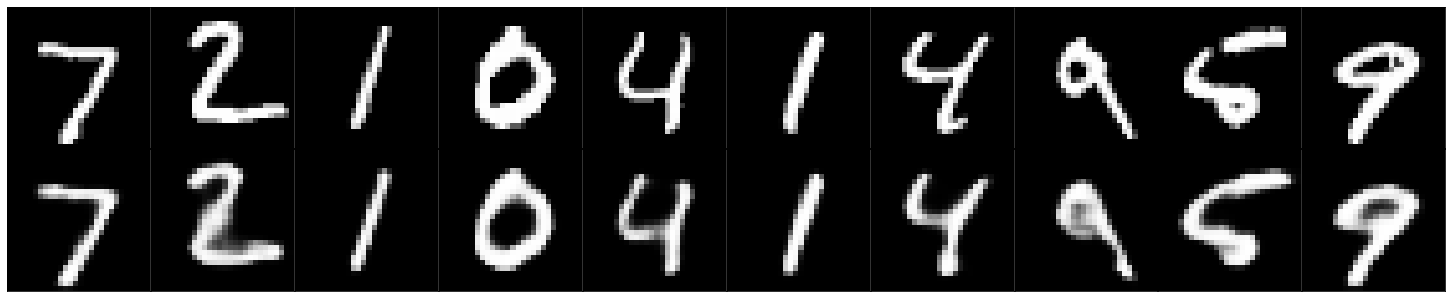

In [12]:
fig , axes = plt.subplots(nrows = 2 , ncols = 10 , sharex = True , sharey = True , figsize = (20 , 4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded , feed_dict = {inputs_:in_imgs.reshape((10 , 28 , 28 , 1))})

for images , row in zip([in_imgs , reconstructed] , axes):
    for img , ax in zip(images , row):
        ax.imshow(img.reshape((28 , 28)) , cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad = 0.1)

In [13]:
sess.close

<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x0000024354334DD8>>